Martín Amado - 19020
Juan Pablo Pineda - 19087
Laura Tamath - 19365

referencia para análisis de datos: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#4.-Missing-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.stats.diagnostic as diag
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
import sklearn.preprocessing
import random
import graphviz
## import pyclustertend 
from sklearn.cluster import Birch
import matplotlib.cm as cm
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

C:\Users\reque\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## Análisis  exploratorio
Explicación de hallazgos y conclusiones -Laura

In [22]:
data = pd.read_csv('./train.csv', encoding = "latin1")
file = open('cuantitativas.txt', 'r')
quant= file.read().splitlines()
file = open('cualitativas.txt', 'r')
quali= file.read().splitlines()

In [ ]:
#Variables cuantitativas
data[quant].describe()

In [ ]:
for var in quant:
    localData = data[var].dropna(how='all', axis=0)
  
    sns.displot(localData, kde=True)

    print( var, ':', ' Kurtosis:', stats.kurtosis(localData), 'Asimetría:', stats.skew(localData), '\n')

In [ ]:
#Variables cualitativas
for var in quali:
  data[var].value_counts().plot(kind='barh')
  plt.figure(figsize=(20,5))
  print(var)
  plt.show()

In [ ]:
# Variables de interes
print('\033[36m' + 'Kurtosis: %f' % data['SalePrice'].kurt())
print('\033[36m' + 'Asimetría: %f' % data['SalePrice'].skew())
data['SalePrice'].describe()

In [ ]:
stat,p = stats.shapiro(data[["SalePrice"]].dropna())
print('Prueba de Kolmogorov-Smirnov:\np=%f\n'% p)
ks_statistic, p_value = diag.lilliefors(data[["SalePrice"]].dropna())
print('Prueba de Lilliefors:\nks=%f\np=%f'%(ks_statistic,p_value))

In [ ]:
sns.displot(data['SalePrice'], kde=True)

In [ ]:
sns.boxplot(x=data["SalePrice"])

In [ ]:
k = 11
corrmat = data.corr()
columns = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [ ]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[columns], height= 3)
plt.show()

## Análisis de grupos
Explicación de las características - Laura

In [ ]:
#cualitativa
groups = ['OverallQual', 'YearBuilt']
_lista = list(np.array(data[[ groups[0]]]))
group = list(data.groupby(by=groups[0]).groups.keys())
tags = []
number = {}
tagNo = {}

for i in range(len(group)): 
  number[group[i]] = i
  tagNo[i] = group[i]

for i in range(len(_lista)): tags.append(number[_lista[i][0]])

# Cuantitativa
# columnsToUse = ["SalePrice", "GarageCars", "FullBath", "TotalBsmtSF", "GrLivArea"]
d_cluster = data[quant].fillna(0)
X_scale = sklearn.preprocessing.scale(d_cluster)

## Variable respuesta
permite clasificar las casas  en Económicas, Intermedias o Caras. -Pineda

## Entrenamiento y prueba
Descripción del criterio que se usó para crear los conjuntos: número de filas de cada uno, estratificado o no, balanceado o no, etc. -Pineda

# Árbol de clasificación
Muestre el modelo gráficamente. El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código. - Martin

In [23]:
temp = data[quant]
temp = temp.dropna()
y = temp.pop("SalePrice")
quant.remove("SalePrice")
x = temp[quant]

random.seed(579)
len(x)

1195

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

In [14]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42)
arbol = arbol.fit(x_train, y_train)

[Text(0.5431034482758621, 0.9, 'Condition1 <= 1.5\ngini = 0.996\nsamples = 836\nvalue = [1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 3, 1, 2, 2, 2, 3, 2, 1, 2, 4, 1\n3, 2, 2, 1, 1, 3, 1, 2, 2, 1, 1, 3, 2, 1\n1, 2, 2, 2, 1, 3, 1, 1, 1, 5, 2, 1, 1, 1\n1, 3, 1, 1, 3, 1, 2, 1, 2, 1, 5, 1, 1, 2\n2, 2, 8, 1, 1, 3, 1, 2, 1, 1, 6, 3, 1, 4\n2, 5, 1, 2, 1, 6, 1, 4, 1, 2, 7, 3, 1, 2\n1, 3, 1, 5, 2, 1, 7, 1, 2, 1, 1, 7, 3, 5\n1, 1, 1, 6, 3, 2, 6, 1, 1, 3, 4, 1, 3, 4\n1, 2, 1, 1, 1, 1, 7, 2, 1, 3, 2, 1, 2, 1\n3, 1, 1, 1, 6, 1, 1, 11, 1, 5, 1, 2, 2, 1\n6, 1, 1, 5, 1, 1, 1, 9, 1, 1, 2, 1, 6, 1\n1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1\n3, 1, 1, 1, 1, 1, 10, 1, 1, 3, 1, 5, 1, 2\n2, 3, 1, 1, 8, 1, 1, 1, 2, 3, 1, 1, 2, 2\n1, 1, 4, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 6\n3, 1, 2, 1, 1, 1, 3, 1, 1, 7, 1, 1, 3, 1\n1, 3, 1, 6, 2, 1, 1, 1, 1, 2, 5, 2, 5, 1\n1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1\n4, 4, 1, 4, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2\n1, 1, 1, 5, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1\n1, 2, 2, 1, 1, 2, 4, 1, 1, 

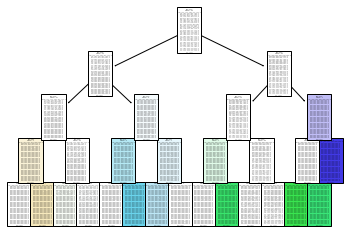

In [24]:
tree.plot_tree(arbol, feature_names=data.columns, filled=True)

In [25]:
y_pred = arbol.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.011142061281337047
Precision: 0.0003465191748033348
Recall: 0.011142061281337047


C:\Users\reque\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\reque\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Árbol de regresión
para predecir el precio de las viviendas utilizando el conjunto 
de entrenamiento. Muestre el modelo gráficamente. 
El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código. -Laura

## Determinar la eficiencia del algoritmo
para clasificar y predecir, en dependencia de las características de la variable respuesta.  -Martin

## Ánalisis de eficiencia
Usando una matriz de confusión para el árbol de clasificación. -Martin

## Análisis del desempeño del árbol de regresión 
-pineda

## Utilice random  forest
Explique  sus resultados comparando ambos algoritmos.  -Martin